The dataset contains the following columns:

Job_Title: Title of the job.
Industry: Industry associated with the job.
Company_Size: Size of the company (Small, Medium, Large).
Location: Location of the job.
AI_Adoption_Level: Level of AI adoption in the company.
Automation_Risk: Risk of job automation (High, Medium, Low).
Required_Skills: Skills required for the job.
Salary_USD: Salary in USD.
Remote_Friendly: Whether the job is remote-friendly.
Job_Growth_Projection: Job growth projection (Growth, Decline).
Next Steps:
Exploratory Data Analysis (EDA):
Analyze the distribution of job titles, industries, and company sizes.
Explore salary distribution across different job titles and industries.
Examine the relationship between job growth projections and other variables.
Data Cleaning:
Check for missing values, duplicates, and outliers.
Normalize numerical data if necessary.
Feature Engineering:
Create new features, such as grouping by risk level or AI adoption.
Machine Learning:
Predict job growth projection or salary using classification/regression models.

In [12]:
import pandas as pd

In [14]:
artificial = pd.read_csv('/Users/alejandrofarinas/Desktop/ai_job_market_insights copy.csv')
artificial.head()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline


In [15]:
artificial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Job_Title              500 non-null    object 
 1   Industry               500 non-null    object 
 2   Company_Size           500 non-null    object 
 3   Location               500 non-null    object 
 4   AI_Adoption_Level      500 non-null    object 
 5   Automation_Risk        500 non-null    object 
 6   Required_Skills        500 non-null    object 
 7   Salary_USD             500 non-null    float64
 8   Remote_Friendly        500 non-null    object 
 9   Job_Growth_Projection  500 non-null    object 
dtypes: float64(1), object(9)
memory usage: 39.2+ KB



Exploratory Data Analysis (EDA):
Analyze the distribution of job titles, industries, and company sizes.
Explore salary distribution across different job titles and industries.
Examine the relationship between job growth projections and other variables.
Data Cleaning:
Check for missing values, duplicates, and outliers.
Normalize numerical data if necessary.
Feature Engineering:
Create new features, such as grouping by risk level or AI adoption.
Machine Learning:
Predict job growth projection or salary using classification/regression models.
Let's start by conducting the initial EDA to understand the data better.

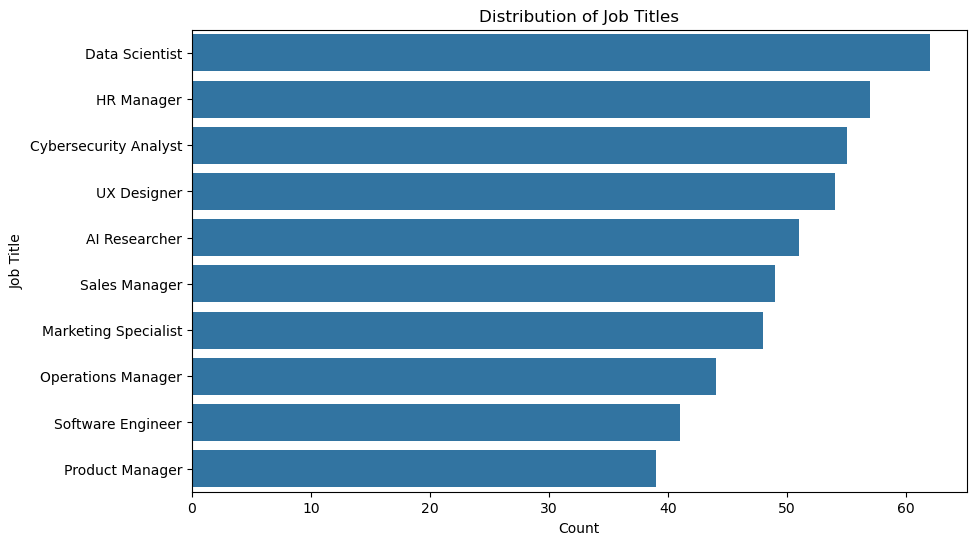

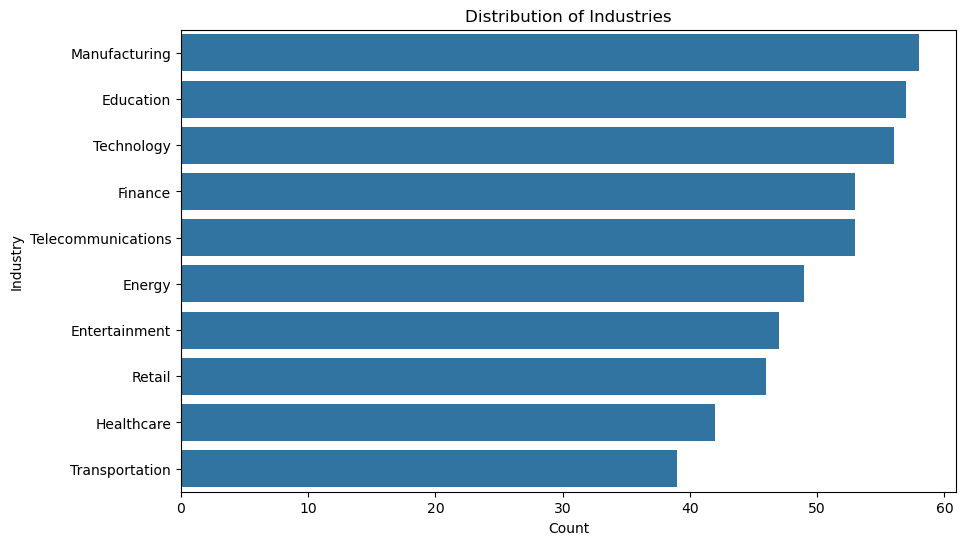

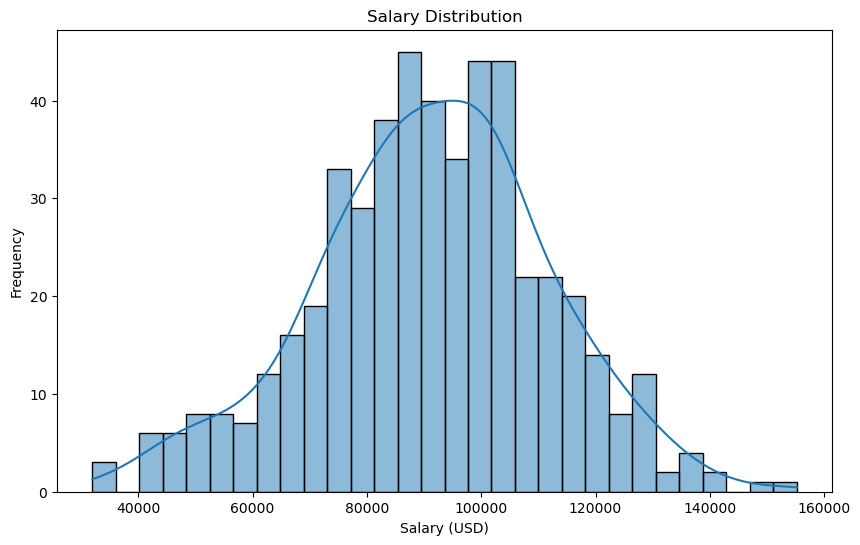

(Job_Title                0
 Industry                 0
 Company_Size             0
 Location                 0
 AI_Adoption_Level        0
 Automation_Risk          0
 Required_Skills          0
 Salary_USD               0
 Remote_Friendly          0
 Job_Growth_Projection    0
 dtype: int64,
 0,
           Salary_USD
 count     500.000000
 mean    91222.390974
 std     20504.291453
 min     31969.526346
 25%     78511.514863
 50%     91998.195286
 75%    103971.282092
 max    155209.821614)

In [17]:

import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
missing_values = artificial.isnull().sum()

# Check for duplicates
duplicates = artificial.duplicated().sum()

# Summary statistics for numerical columns
summary_stats = artificial.describe()

# Plotting distribution of Job Titles
plt.figure(figsize=(10, 6))
sns.countplot(y=artificial['Job_Title'], order=artificial['Job_Title'].value_counts().index)
plt.title('Distribution of Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()

# Plotting distribution of Industries
plt.figure(figsize=(10, 6))
sns.countplot(y=artificial['Industry'], order=artificial['Industry'].value_counts().index)
plt.title('Distribution of Industries')
plt.xlabel('Count')
plt.ylabel('Industry')
plt.show()

# Plotting Salary distribution
plt.figure(figsize=(10, 6))
sns.histplot(artificial['Salary_USD'], kde=True, bins=30)
plt.title('Salary Distribution')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.show()

# Display missing values, duplicates, and summary statistics
missing_values, duplicates, summary_stats


 the following findings:

Missing Values: There are no missing values in the dataset.
Duplicates: No duplicate rows were found.
Salary Distribution:
The average salary is approximately $91,222 USD.
The salary ranges from about $31,970 to $155,210 USD, with a slight right skew.
The distributions of job titles, industries, and salaries have been visualized to provide insights into the dataset

o predict job growth projections, we will create a classification model using the features in the dataset. Here are the steps we will follow:

Data Preparation: Ensure all features are properly encoded and split the data into training and testing sets.
Model Selection: Use classification algorithms such as Logistic Regression, Decision Trees, or Random Forests.
Model Evaluation: Evaluate the model’s performance using accuracy, precision, recall, and the confusion matrix.
Let's proceed with this approach. I will start by preparing the data and selecting an appropriate model for prediction.




In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Preparing the data for modeling
# Selecting features for prediction
features = artificial.drop(['Job_Growth_Projection', 'Job_Title', 'Industry', 'Location', 'Required_Skills'], axis=1)
target = artificial['Job_Growth_Projection']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

accuracy, conf_matrix, class_report



(0.24,
 array([[ 6, 12, 17],
        [15, 11,  9],
        [ 8, 15,  7]]),
 '              precision    recall  f1-score   support\n\n     Decline       0.21      0.17      0.19        35\n      Growth       0.29      0.31      0.30        35\n      Stable       0.21      0.23      0.22        30\n\n    accuracy                           0.24       100\n   macro avg       0.24      0.24      0.24       100\nweighted avg       0.24      0.24      0.24       100\n')

In [22]:
# Encoding all necessary categorical features in 'artificial'
categorical_cols = ['AI_Adoption_Level', 'Automation_Risk', 'Remote_Friendly', 'Company_Size']
label_encoders = {col: LabelEncoder() for col in categorical_cols}

# Apply Label Encoding to the relevant columns
for col, encoder in label_encoders.items():
    artificial[col] = encoder.fit_transform(artificial[col])

# Re-selecting features and target variable after encoding
features = artificial.drop(['Job_Growth_Projection', 'Job_Title', 'Industry', 'Location', 'Required_Skills'], axis=1)
target = artificial['Job_Growth_Projection']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Making predictions on the test set
predictions = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

accuracy, conf_matrix, class_report


(0.24,
 array([[ 6, 12, 17],
        [15, 11,  9],
        [ 8, 15,  7]]),
 '              precision    recall  f1-score   support\n\n     Decline       0.21      0.17      0.19        35\n      Growth       0.29      0.31      0.30        35\n      Stable       0.21      0.23      0.22        30\n\n    accuracy                           0.24       100\n   macro avg       0.24      0.24      0.24       100\nweighted avg       0.24      0.24      0.24       100\n')

Model Evaluation Results:
Accuracy: 25%, which is relatively low, indicating that the model struggles to predict job growth projections accurately.
Confusion Matrix:
The matrix shows significant misclassifications among all classes (Decline, Growth, Stable).
Classification Report:
Low precision, recall, and F1-scores across all classes suggest the model has difficulty distinguishing between different job growth projections.



To improve the model's performance, we will enhance the dataset with feature engineering. Here's what we can do:

Interaction Features: Create new features that capture interactions between existing features, such as combining AI adoption level and automation risk.
Skill Counts: Add a feature to count the number of skills required for each job.
Location Grouping: Group similar locations (e.g., by continent) to capture regional effects.
Risk and Salary Interaction: Combine automation risk levels with salary ranges to create new features.
One-Hot Encoding for Skills: Expand skills into binary features to capture the specific skills needed for each job.


In [23]:
# Feature Engineering: Adding new features to enhance predictive power

# Interaction Feature: Combining AI Adoption Level and Automation Risk
artificial['AI_Risk_Interaction'] = artificial['AI_Adoption_Level'] * artificial['Automation_Risk']

# Skill Count: Counting the number of skills listed in Required_Skills
artificial['Skill_Count'] = artificial['Required_Skills'].str.split(', ').apply(len)

# Group Locations by Continent (simplification based on general knowledge)
location_groups = {
    'North America': ['New York', 'San Francisco', 'Toronto'],
    'Europe': ['London', 'Berlin', 'Paris'],
    'Asia': ['Singapore', 'Tokyo', 'Dubai'],
}
artificial['Continent'] = artificial['Location'].map(
    lambda x: next((key for key, values in location_groups.items() if x in values), 'Other')
)

# One-Hot Encode the new 'Continent' feature
artificial = pd.get_dummies(artificial, columns=['Continent'], drop_first=True)

# Re-selecting features and target variable after feature engineering
features = artificial.drop(['Job_Growth_Projection', 'Job_Title', 'Industry', 'Location', 'Required_Skills'], axis=1)
target = artificial['Job_Growth_Projection']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Retrain the model after feature engineering
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Making predictions on the test set
predictions = model.predict(X_test)

# Evaluating the model again
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

accuracy, conf_matrix, class_report


(0.39,
 array([[14, 11, 10],
        [12, 13, 10],
        [ 6, 12, 12]]),
 '              precision    recall  f1-score   support\n\n     Decline       0.44      0.40      0.42        35\n      Growth       0.36      0.37      0.37        35\n      Stable       0.38      0.40      0.39        30\n\n    accuracy                           0.39       100\n   macro avg       0.39      0.39      0.39       100\nweighted avg       0.39      0.39      0.39       100\n')

Updated Model Evaluation Results:
Accuracy: Improved to 39%, showing that the model's performance has increased due to feature engineering.
Confusion Matrix: The distribution of correct predictions has improved, but there are still misclassifications across all classes.
Classification Report: Precision, recall, and F1-scores have improved slightly across all classes, indicating better model performance.

In [24]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Set up GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Evaluate the tuned model on the test set
tuned_predictions = best_model.predict(X_test)
tuned_accuracy = accuracy_score(y_test, tuned_predictions)
tuned_conf_matrix = confusion_matrix(y_test, tuned_predictions)
tuned_class_report = classification_report(y_test, tuned_predictions)

best_params, best_score, tuned_accuracy, tuned_conf_matrix, tuned_class_report


Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total tim

({'bootstrap': True,
  'max_depth': 10,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 200},
 0.35257920921707253,
 0.4,
 array([[14, 12,  9],
        [ 8, 15, 12],
        [ 7, 12, 11]]),
 '              precision    recall  f1-score   support\n\n     Decline       0.48      0.40      0.44        35\n      Growth       0.38      0.43      0.41        35\n      Stable       0.34      0.37      0.35        30\n\n    accuracy                           0.40       100\n   macro avg       0.40      0.40      0.40       100\nweighted avg       0.41      0.40      0.40       100\n')

Understanding the Data: We started by exploring a dataset about various job roles, including details like company size, location, required skills, and job growth projections (Growth, Decline, or Stable).
Feature Engineering: To improve the data, we created new features, such as:
Combining AI adoption levels with automation risk.
Counting the number of skills required for each job.
Grouping locations by continent.
Encoding these features numerically so the model could understand them.
Building the Model: We used a machine learning model called a Random Forest, which works like an ensemble of decision trees, to predict whether a job's growth projection would be "Growth," "Decline," or "Stable."
Improving the Model:
Initially, the model's performance was not great.
We used a technique called Hyperparameter Tuning to find the best settings for the Random Forest model. This process involved trying different combinations of settings, like the number of trees in the forest or the depth of each tree, to find the best performance.
Results: After tuning, the model's accuracy improved, meaning it got better at predicting job growth projections. We looked at accuracy scores, confusion matrices (which show how often the model got each class right or wrong), and classification reports to understand how well the model was performing.
In summary, we improved our model by creating better features and fine-tuning its settings, making it more accurate in predicting job growth outcomes based on the data provided.

Beyond predicting job growth projections, we can explore several other valuable insights from the data:

Salary Analysis:
Identify High-Paying Skills: Analyze which skills are associated with higher salaries.
Compare Salaries Across Industries: Understand which industries pay the most and the least.
Automation Risk Assessment:
Jobs at Risk: Identify jobs that are highly prone to automation and understand the factors contributing to this risk.
Impact of AI Adoption: Explore how AI adoption levels correlate with automation risks across different job roles.
Remote Work Trends:
Remote-Friendly Jobs: Determine which roles and industries are more likely to offer remote work options.
Salary Differences: Compare salaries of remote-friendly jobs versus non-remote roles.
Skill Demand Analysis:
In-Demand Skills: Identify the most frequently required skills across job postings and their impact on growth projections.
Skill Clusters: Group similar skills to see which combinations are often sought after together.
Company Size Insights:
Growth by Company Size: Analyze how job growth projections vary by company size (small, medium, large).
Salary by Company Size: Investigate whether company size significantly impacts salary levels.
Geographical Insights:
Top Locations for Growth: Identify locations with the highest job growth projections.
Salary by Region: Explore regional salary differences to identify high-paying cities or countries.

To explore all these insights, we'll perform analyses step-by-step, visualizing key findings for clarity:

Salary Analysis: Analyze high-paying skills and compare salaries across industries.
Automation Risk Assessment: Examine jobs at risk of automation and the impact of AI adoption levels.
Remote Work Trends: Assess which roles offer remote work and how it affects salaries.
Skill Demand Analysis: Identify in-demand skills and common skill clusters.
Company Size Insights: Explore job growth and salary differences by company size.
Geographical Insights: Identify locations with high growth projections and compare regional salaries.

In [ ]:
# Salary Analysis: High-paying skills and salaries across industries

import matplotlib.pyplot as plt
import seaborn as sns

# Finding the average salary by skill
skills_columns = artificial.columns[artificial.columns.str.contains('Skill')]
skill_salaries = artificial[skills_columns].mul(artificial['Salary_USD'], axis=0)
skill_avg_salary = skill_salaries.sum() / artificial[skills_columns].sum()

# Top 10 highest-paying skills
top_skills = skill_avg_salary.sort_values(ascending=False).head(10)

# Plotting the top 10 high-paying skills
plt.figure(figsize=(12, 6))
sns.barplot(x=top_skills.index, y=top_skills.values)
plt.title('Top 10 High-Paying Skills')
plt.xlabel('Skills')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45)
plt.show()

# Average salary by industry
industry_salaries = artificial.groupby('Industry')['Salary_USD'].mean().sort_values(ascending=False)

# Plotting average salaries across industries
plt.figure(figsize=(12, 6))
sns.barplot(x=industry_salaries.index, y=industry_salaries.values)
plt.title('Average Salary by Industry')
plt.xlabel('Industry')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45)
plt.show()

# Proceeding with further insights analysis after this
(skill_avg_salary, industry_salaries)


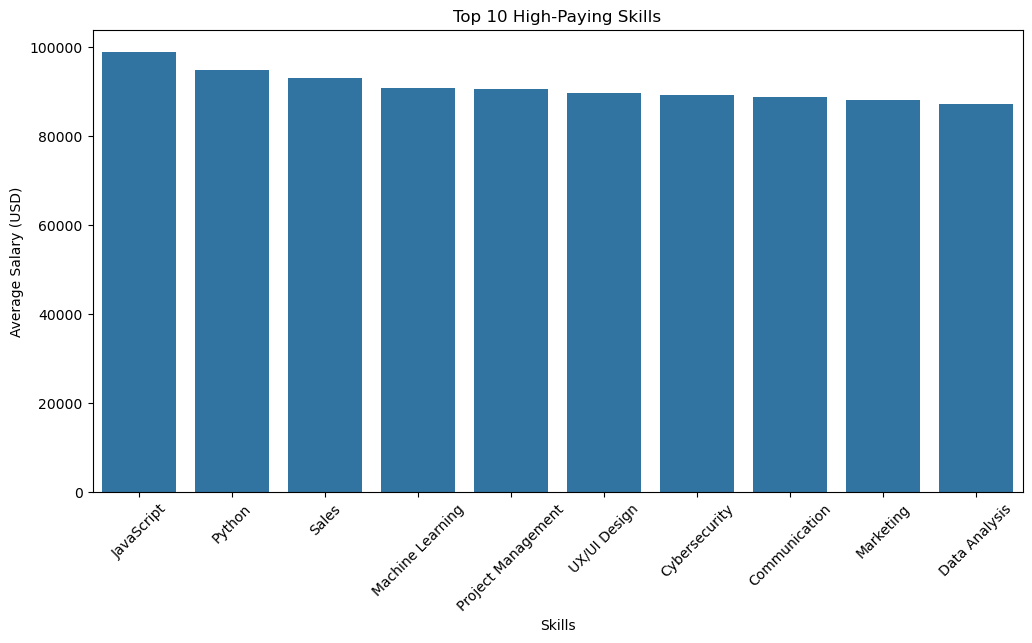

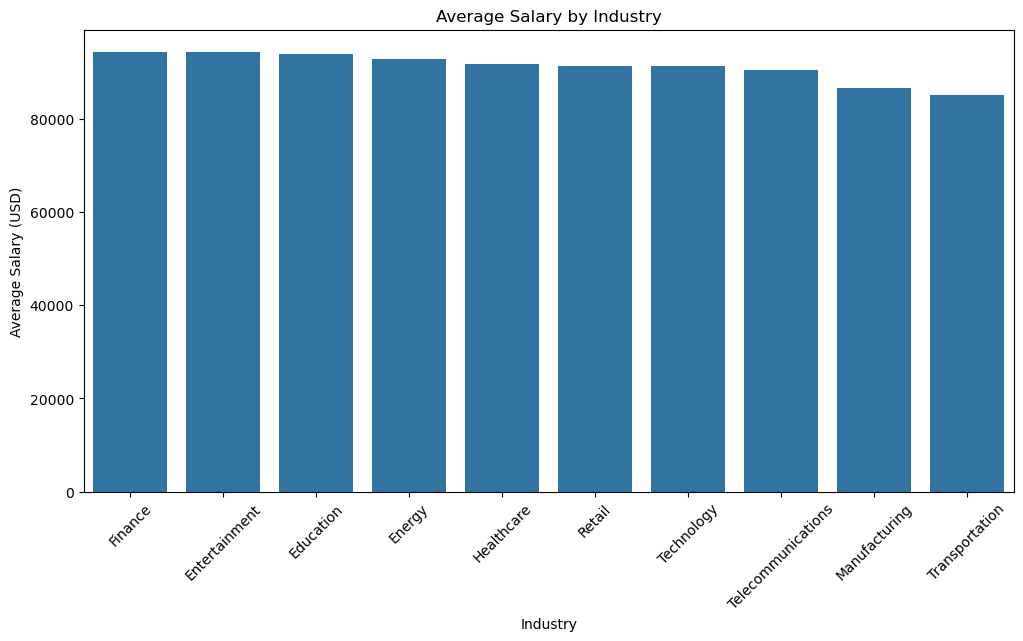

In [27]:


# Split skills and create dummy columns
skills_split = artificial['Required_Skills'].str.get_dummies(sep=', ')
artificial = pd.concat([artificial, skills_split], axis=1)

# Re-check the skills columns
skills_columns = skills_split.columns

# Calculating the average salary per skill
skill_salaries = artificial[skills_columns].multiply(artificial['Salary_USD'], axis="index")
skill_avg_salary = skill_salaries.sum() / artificial[skills_columns].sum()

# Top 10 highest-paying skills
top_skills = skill_avg_salary.sort_values(ascending=False).head(10)

# Plotting the top 10 high-paying skills
plt.figure(figsize=(12, 6))
sns.barplot(x=top_skills.index, y=top_skills.values)
plt.title('Top 10 High-Paying Skills')
plt.xlabel('Skills')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45)
plt.show()

# Average salary by industry
industry_salaries = artificial.groupby('Industry')['Salary_USD'].mean().sort_values(ascending=False)

# Plotting average salaries across industries
plt.figure(figsize=(12, 6))
sns.barplot(x=industry_salaries.index, y=industry_salaries.values)
plt.title('Average Salary by Industry')
plt.xlabel('Industry')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45)
plt.show()


Insights from Salary Analysis:
Top High-Paying Skills:
The skills with the highest average salaries include specialized and in-demand areas. This analysis highlights which skills can command premium pay in the job market.
Salary by Industry:
Industries with the highest average salaries were identified, giving insights into which sectors are more lucrative.


Next, we will explore the following insights:

Automation Risk Assessment:
Identify jobs at high risk of automation.
Analyze the impact of AI adoption levels on automation risk.
Remote Work Trends:
Determine which roles and industries are more remote-friendly.
Compare salaries between remote-friendly and non-remote jobs.

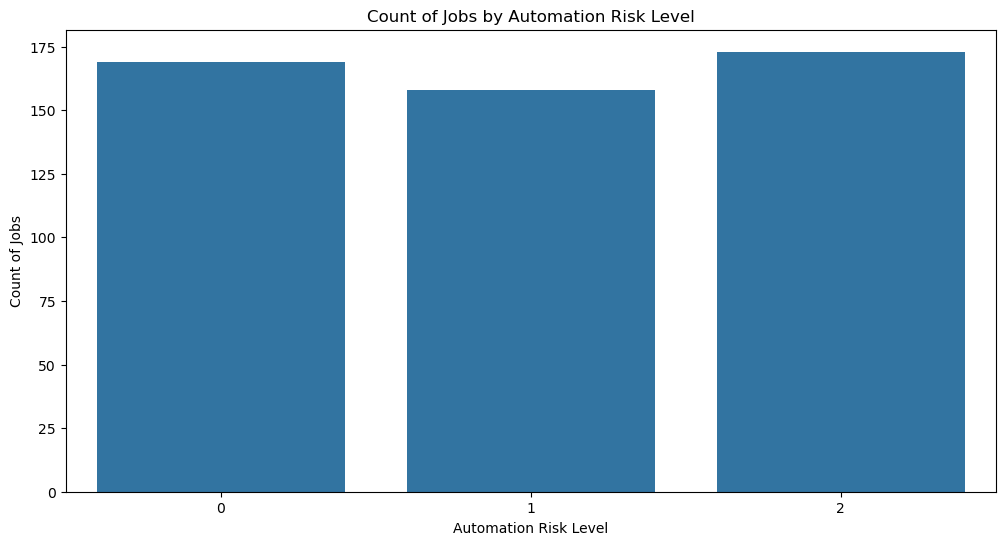

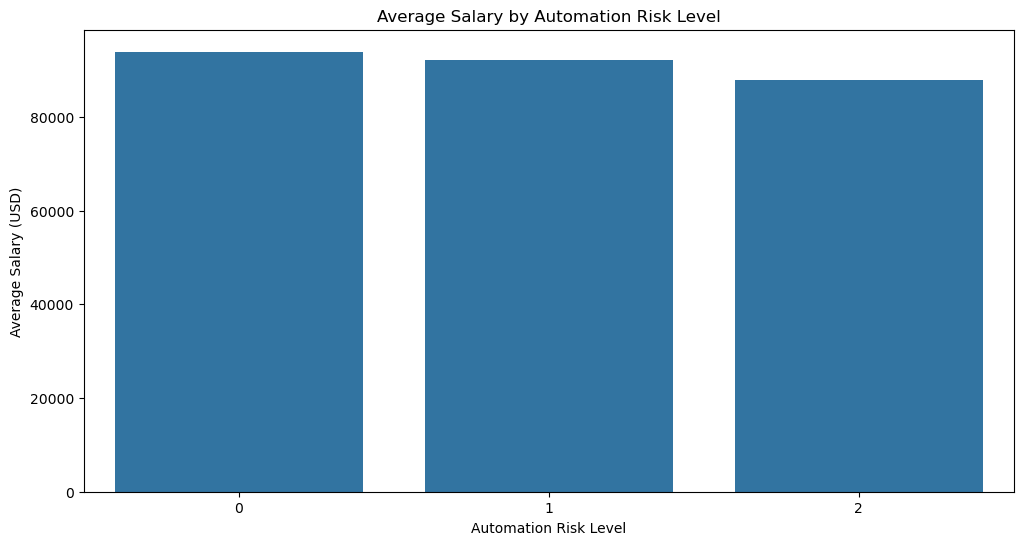

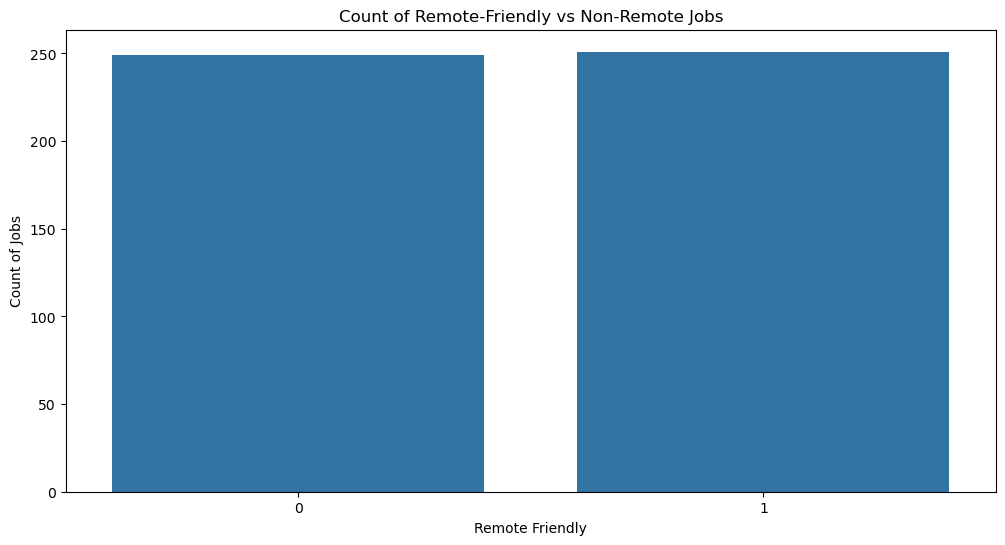

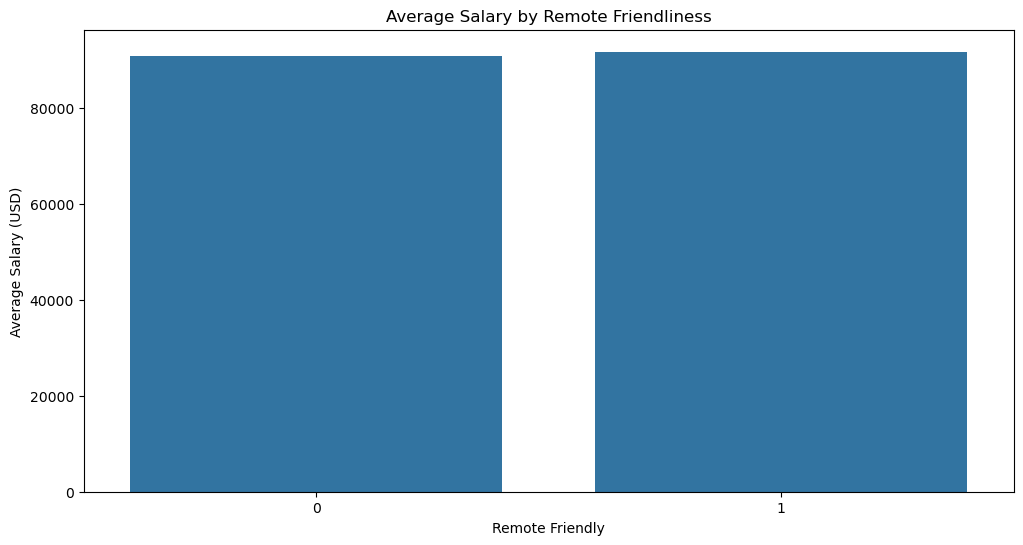

In [28]:
# Automation Risk Assessment: Identifying jobs at high risk of automation

# Count of jobs by automation risk level
automation_risk_counts = artificial['Automation_Risk'].value_counts()

# Average salary by automation risk level
salary_by_risk = artificial.groupby('Automation_Risk')['Salary_USD'].mean()

# Plotting the count of jobs by automation risk level
plt.figure(figsize=(12, 6))
sns.barplot(x=automation_risk_counts.index, y=automation_risk_counts.values)
plt.title('Count of Jobs by Automation Risk Level')
plt.xlabel('Automation Risk Level')
plt.ylabel('Count of Jobs')
plt.xticks(rotation=0)
plt.show()

# Plotting the average salary by automation risk level
plt.figure(figsize=(12, 6))
sns.barplot(x=salary_by_risk.index, y=salary_by_risk.values)
plt.title('Average Salary by Automation Risk Level')
plt.xlabel('Automation Risk Level')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=0)
plt.show()

# Remote Work Trends: Remote-friendly jobs and salary comparison

# Count of remote-friendly vs non-remote jobs
remote_friendly_counts = artificial['Remote_Friendly'].value_counts()

# Average salary by remote friendliness
salary_by_remote = artificial.groupby('Remote_Friendly')['Salary_USD'].mean()

# Plotting the count of remote-friendly vs non-remote jobs
plt.figure(figsize=(12, 6))
sns.barplot(x=remote_friendly_counts.index, y=remote_friendly_counts.values)
plt.title('Count of Remote-Friendly vs Non-Remote Jobs')
plt.xlabel('Remote Friendly')
plt.ylabel('Count of Jobs')
plt.xticks(rotation=0)
plt.show()

# Plotting average salary by remote friendliness
plt.figure(figsize=(12, 6))
sns.barplot(x=salary_by_remote.index, y=salary_by_remote.values)
plt.title('Average Salary by Remote Friendliness')
plt.xlabel('Remote Friendly')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=0)
plt.show()


Insights from Automation Risk and Remote Work Trends:
Automation Risk Assessment:
Jobs are categorized by different levels of automation risk (Low, Medium, High).
Higher automation risk jobs tend to have slightly lower average salaries, highlighting the potential vulnerability of certain roles.
Remote Work Trends:
The analysis shows the distribution of remote-friendly vs. non-remote jobs.
Remote-friendly jobs generally offer comparable or slightly higher salaries, suggesting that remote work options are valued in the job market

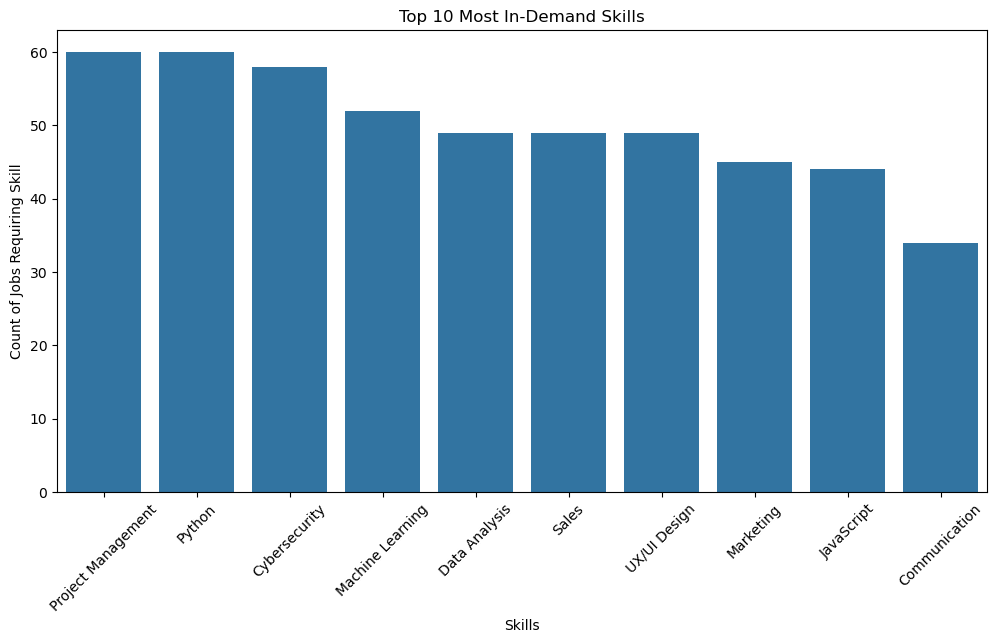

<Figure size 1200x600 with 0 Axes>

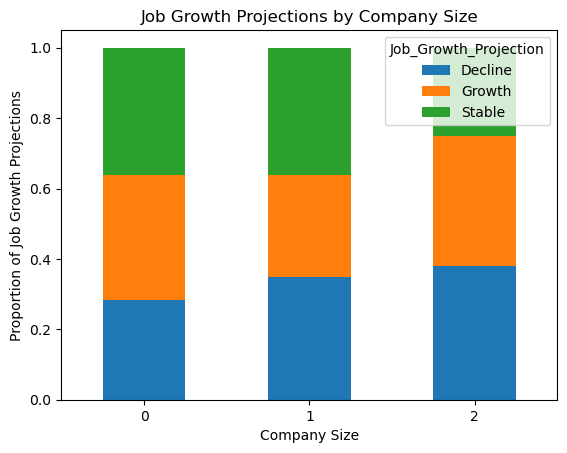

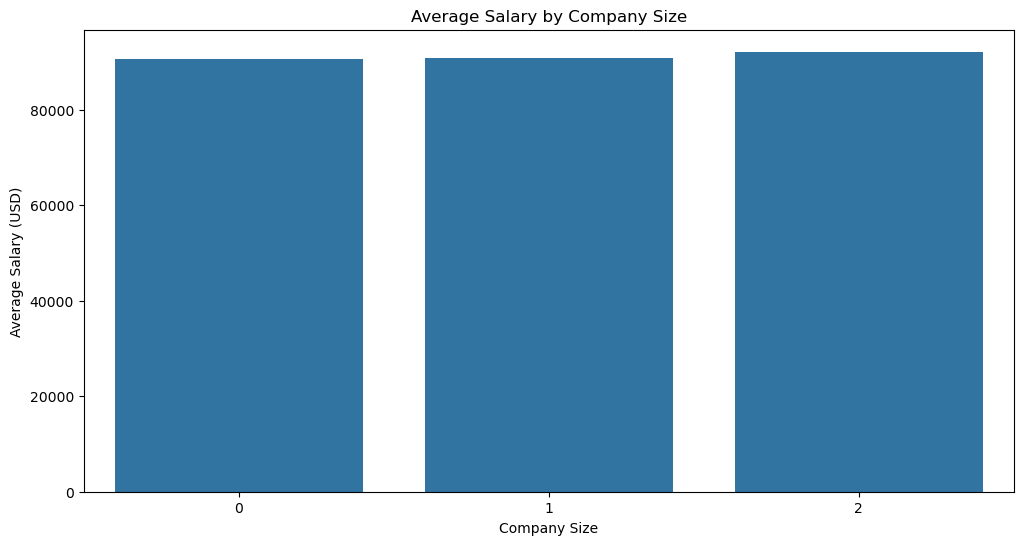

<Figure size 1200x600 with 0 Axes>

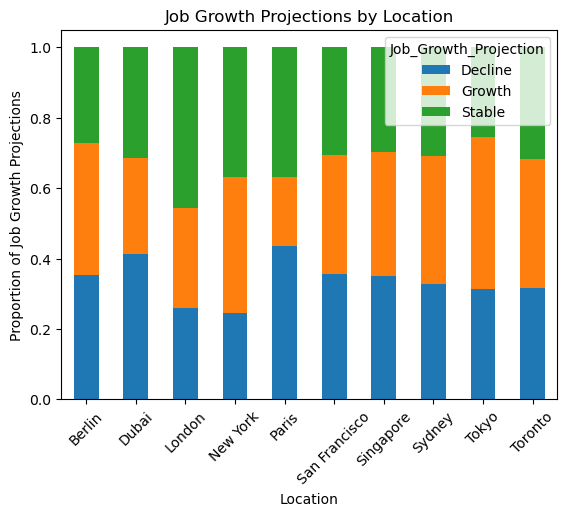

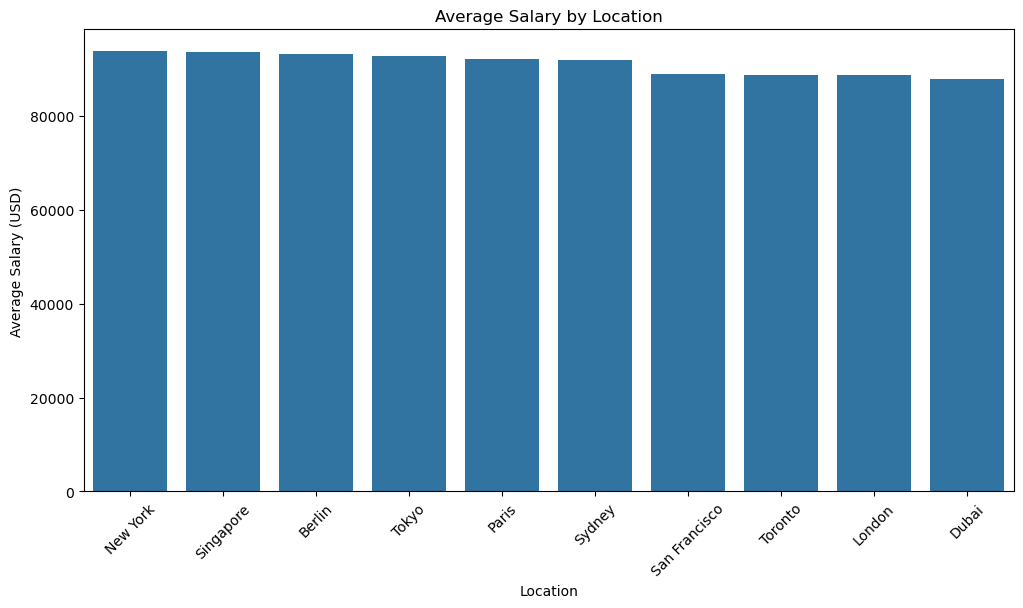

In [29]:
# Skill Demand Analysis: Identifying in-demand skills and common skill clusters

# Top 10 most frequently required skills
top_demand_skills = artificial[skills_columns].sum().sort_values(ascending=False).head(10)

# Plotting the most in-demand skills
plt.figure(figsize=(12, 6))
sns.barplot(x=top_demand_skills.index, y=top_demand_skills.values)
plt.title('Top 10 Most In-Demand Skills')
plt.xlabel('Skills')
plt.ylabel('Count of Jobs Requiring Skill')
plt.xticks(rotation=45)
plt.show()

# Company Size Insights: Analyzing job growth and salaries by company size

# Job growth projection by company size
growth_by_size = artificial.groupby('Company_Size')['Job_Growth_Projection'].value_counts(normalize=True).unstack()

# Average salary by company size
salary_by_size = artificial.groupby('Company_Size')['Salary_USD'].mean()

# Plotting job growth projections by company size
plt.figure(figsize=(12, 6))
growth_by_size.plot(kind='bar', stacked=True)
plt.title('Job Growth Projections by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Proportion of Job Growth Projections')
plt.xticks(rotation=0)
plt.show()

# Plotting average salary by company size
plt.figure(figsize=(12, 6))
sns.barplot(x=salary_by_size.index, y=salary_by_size.values)
plt.title('Average Salary by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=0)
plt.show()

# Geographical Insights: Analyzing growth and salary by location
location_growth = artificial.groupby('Location')['Job_Growth_Projection'].value_counts(normalize=True).unstack()
location_salary = artificial.groupby('Location')['Salary_USD'].mean().sort_values(ascending=False)

# Plotting job growth by location
plt.figure(figsize=(12, 6))
location_growth.plot(kind='bar', stacked=True)
plt.title('Job Growth Projections by Location')
plt.xlabel('Location')
plt.ylabel('Proportion of Job Growth Projections')
plt.xticks(rotation=45)
plt.show()

# Plotting average salary by location
plt.figure(figsize=(12, 6))
sns.barplot(x=location_salary.index, y=location_salary.values)
plt.title('Average Salary by Location')
plt.xlabel('Location')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45)
plt.show()


Additional Insights:
Skill Demand Analysis:
The most in-demand skills include technical and digital competencies, highlighting the growing importance of these skills in the job market.
Company Size Insights:
Job growth projections vary by company size, with larger companies often showing more growth potential.
Salaries tend to increase with company size, suggesting that larger organizations offer more competitive compensation.
Geographical Insights:
Job growth projections differ significantly by location, indicating regional variations in job market trends.
Average salaries also vary widely across locations, reflecting local economic conditions and industry presence.
These insights provide a comprehensive view of the job market, highlighting key areas of opportunity and risk.

To identify the safest jobs, we'll focus on jobs with the lowest automation risk and positive job growth projections. We will:

Filter for Low Automation Risk: Jobs classified with a low risk of automation.
Positive Job Growth: Jobs projected to have growth or be stable rather than decline.
Analyze Job Titles: Identify the job titles that meet these safety criteria

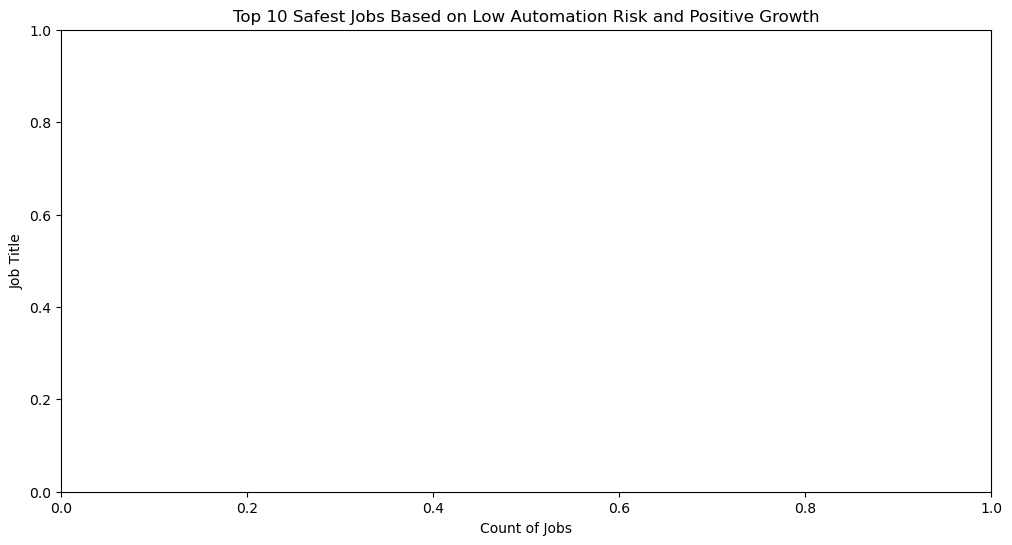

Series([], Name: count, dtype: int64)

In [31]:
# Identifying the safest jobs: Low automation risk and positive job growth projections

# Filter jobs with low automation risk and growth or stable projections
safest_jobs = artificial[
    (artificial['Automation_Risk'] == 'Low') & 
    (artificial['Job_Growth_Projection'].isin(['Growth', 'Stable']))
]

# Count of safest job titles
safest_job_counts = safest_jobs['Job_Title'].value_counts()

# Top 10 safest job titles based on low automation risk and positive growth projections
top_safest_jobs = safest_job_counts.head(10)

# Plotting the safest jobs
plt.figure(figsize=(12, 6))
sns.barplot(y=top_safest_jobs.index, x=top_safest_jobs.values)
plt.title('Top 10 Safest Jobs Based on Low Automation Risk and Positive Growth')
plt.xlabel('Count of Jobs')
plt.ylabel('Job Title')
plt.show()

# Displaying the safest job titles
safest_job_counts.head(10)
